# Versuch 4

In [2]:
import numpy as np
from scipy import signal, stats
from scipy.signal.windows import gaussian
from scipy.signal import gausspulse
import matplotlib.pyplot as plt
import math
import cmath
import sys
import pyaudio

## Audio

running
done
[131071  65536      0 ...     -1      0      1]
44100


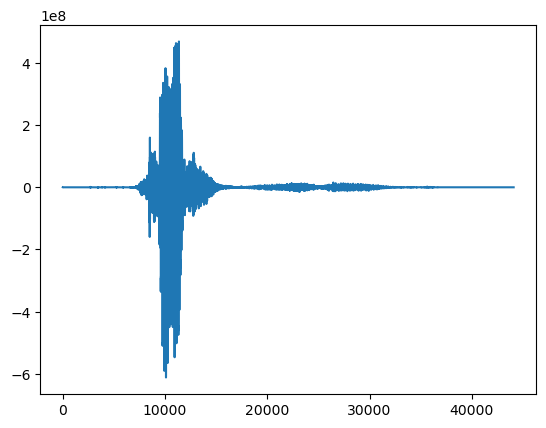

In [121]:
FORMAT = pyaudio.paInt16
SAMPLEFREQ = 44100
FRAMESIZE = 1024
NOFFRAMES = 220
p = pyaudio.PyAudio()
print('running')

stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,
                input=True,frames_per_buffer=FRAMESIZE)
data = stream.read(NOFFRAMES*FRAMESIZE)
decoded = np.frombuffer(data, dtype=int);

stream.stop_stream()
stream.close()
p.terminate()
# loadeddecoded = numpy.load('Hallo.npy')
print('done')

decoded = decoded[2000:]

for i in range(len(decoded)):
    if decoded[i] > 500:
        decoded = decoded[i:]
        break
    
if len(decoded) >= SAMPLEFREQ:
    decoded = decoded [:SAMPLEFREQ]

while(len(decoded) < SAMPLEFREQ):
    decoded = numpy.append(decoded, 0)
    
print(decoded)
print(len(decoded))

np.save('Pfusch', decoded)
plt.plot(decoded)
plt.show()

## Amplitudenspektrum

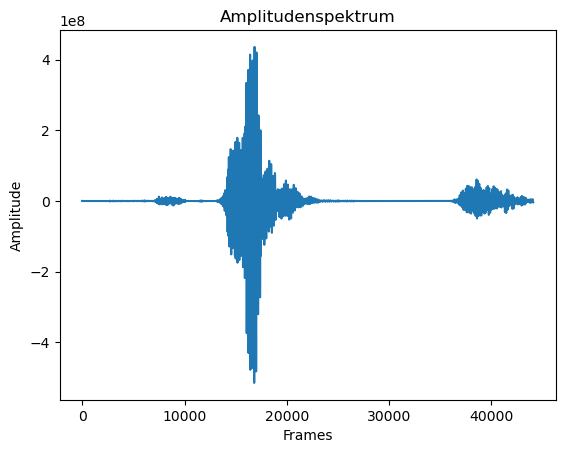

In [3]:
if (len(sys.argv) != 2):
    print("Usage: python " + sys.argv[0] + " filename")
    sys.exit(-1)

img = np.load("training/Hoch1" + ".npy")
plt.title('Amplitudenspektrum')
plt.ylabel('Amplitude')
plt.xlabel('Frames')
plt.plot(img)
plt.show()

### Aufgabe 1 b

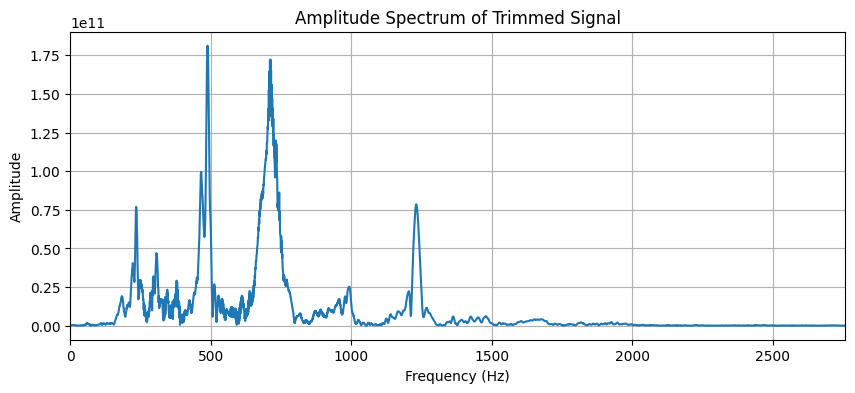

<function matplotlib.pyplot.show(close=None, block=None)>

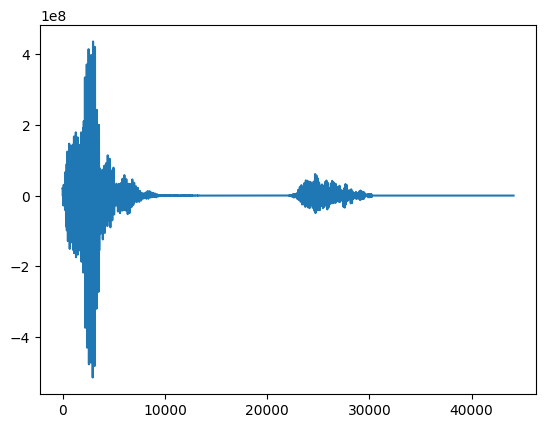

In [8]:
sample_rate=44100

def trigger_function(audio_data, threshold=0.2, duration=1.0):
    # Finde den Index des ersten Werts, der über dem Schwellenwert liegt
    trigger_index = np.argmax(np.abs(audio_data)/1e8 > threshold)

    # Schneide das Signal ab dem Triggerzeitpunkt aus
    #start_index = max(0, trigger_index - int(duration * sample_rate))
    end_index = trigger_index + int(duration * sample_rate)
    trimmed_signal = audio_data[trigger_index:end_index]

    # Fülle fehlende Samples mit Nullen auf
    if len(trimmed_signal) < int(duration * sample_rate):
        trimmed_signal = np.pad(trimmed_signal, (0, int(duration * sample_rate) - len(trimmed_signal)), 'constant')

    return trimmed_signal

audio_data = np.load('training/Hoch1.npy')

trimmed_audio = trigger_function(audio_data)

# Berechne das Amplitudenspektrum mit der Fourier-Transformation
fft_result = np.fft.fft(trimmed_audio)
magnitude_spectrum = np.abs(fft_result)
frequency_axis = np.fft.fftfreq(len(trimmed_audio), 1/sample_rate)

# Plotte das Amplitudenspektrum
plt.figure(figsize=(10, 4))
plt.plot(magnitude_spectrum)
# plt.plot(frequency_axis, magnitude_spectrum)
plt.title('Amplitude Spectrum of Trimmed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, sample_rate / 16)  # Zeige nur positive Frequenzen
plt.grid(True)
plt.show()
plt.plot(trimmed_audio)
plt.show


### Aufgabe 1 c

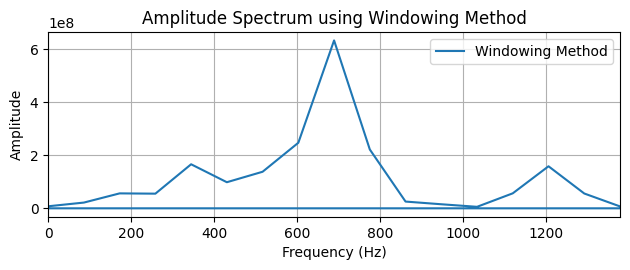

In [7]:
sample_rate=44100

def windowing_method(audio_data, window_size=512, overlap_ratio=0.5):
    # Berechne die Anzahl der Überlappungsfenster
    hop_size = int(window_size * (1 - overlap_ratio))
    num_windows = int((len(audio_data) - window_size) / hop_size) + 1

    # Erzeuge Gaußsches Fenster
    new_g_window = gaussian(512, 128)

    # Initialisiere das Ergebnisarray für die gemittelte Fouriertransformierte
    avg_fft_result = np.zeros(window_size, dtype=np.complex128)

    #Unter dem hier ganz viele test plots zum schauen wie das windowing arbeitet und wie alles aussieht etc...
    #winsig = audio_data[hop_size:hop_size+window_size] * g_window
    #plt.plot(winsig)
    #plt.show()
    f = 100
    test1 = audio_data[f*hop_size:f*hop_size+window_size]
    #plt.plot(test1)
    #plt.show()
    
    
    test2 = audio_data[f*hop_size:f*hop_size+window_size] * new_g_window
    #plt.plot(test2)
    #plt.show()

    ft1 = np.fft.fft(test1, 512)
    ft2 = np.fft.fft(test2, 512)
    freq1 = np.fft.fftfreq(len(test1))

    #plt.plot(ft1.real)
    #plt.xlim(0, sample_rate / 64)  # Zeige nur positive Frequenzen
    #plt.show()

    #plt.plot(ft2.real)
    #plt.show()

    #plt.plot(new_g_window)
    #plt.show()


    # Schleife über alle Überlappungsfenster
    for i in range(num_windows):
        start_index = i * hop_size
        end_index = start_index + window_size

        # Wende das Gaußsche Fenster auf das aktuelle Überlappungsfenster an
        windowed_signal = audio_data[start_index:end_index] * new_g_window

        # Führe eine lokale Fouriertransformation durch
        fft_result = np.fft.fft(windowed_signal)

        # Addiere die Fouriertransformierte zum gemittelten Ergebnis
        avg_fft_result += fft_result

    # Mittelung der Fouriertransformierten
    avg_fft_result /= num_windows

    # Berechne das Amplitudenspektrum
    magnitude_spectrum = np.abs(avg_fft_result)
    frequency_axis = np.fft.fftfreq(window_size, 1 / sample_rate)

    return frequency_axis, magnitude_spectrum

#Triggerfunktion mit geratenem Threshold
def trig(audio_data, threshold=0.2, duration=1.0):
    # Finde den Index des ersten Werts, der über dem Schwellenwert liegt
    trigger_index = np.argmax(np.abs(audio_data)/1e8 > threshold)

    # Schneide das Signal ab dem Triggerzeitpunkt aus
    #start_index = max(0, trigger_index - int(duration * sample_rate))
    end_index = trigger_index + int(duration * sample_rate)
    trimmed_signal = audio_data[trigger_index:end_index]

    # Fülle fehlende Samples mit Nullen auf
    if len(trimmed_signal) < int(duration * sample_rate):
        trimmed_signal = np.pad(trimmed_signal, (0, int(duration * sample_rate) - len(trimmed_signal)), 'constant')

    return trimmed_signal

# Beispiel: Lade Tonaufnahme aus npy-Datei
audio_data = np.load('training/Hoch1.npy')
audio_data = trig(audio_data)

# Verwende die Windowing-Methode
freq_windowing, mag_spectrum_windowing = windowing_method(audio_data)


# Plotte das Amplitudenspektrum aus der vorherigen Teilaufgabe
#plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
# plt.plot(mag_spectrum_windowing, label='Windowing Method')
plt.plot(freq_windowing, mag_spectrum_windowing, label='Windowing Method')
plt.title('Amplitude Spectrum using Windowing Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, sample_rate / 32)  # Zeige nur positive Frequenzen
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Aufgabe 2

Hoch


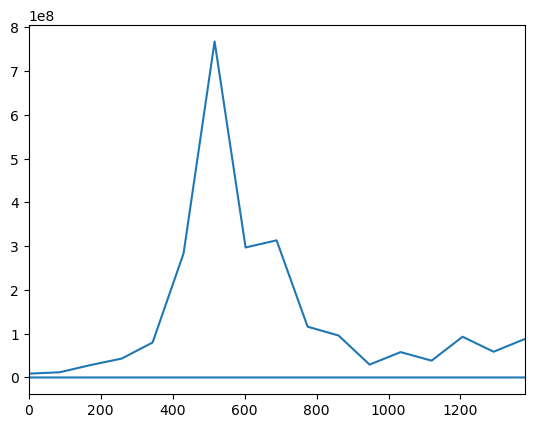

Tief


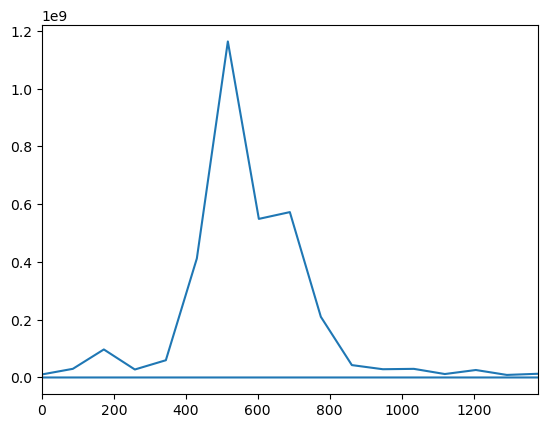

Links


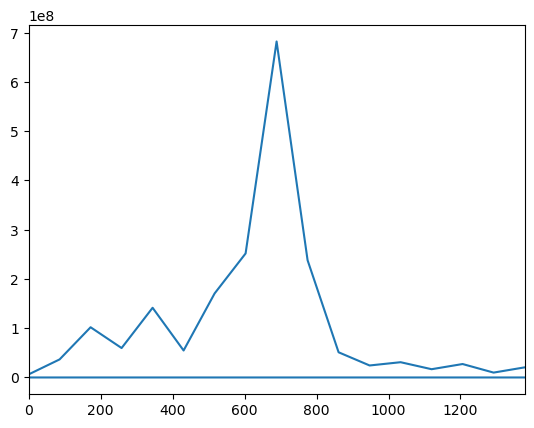

Rechts


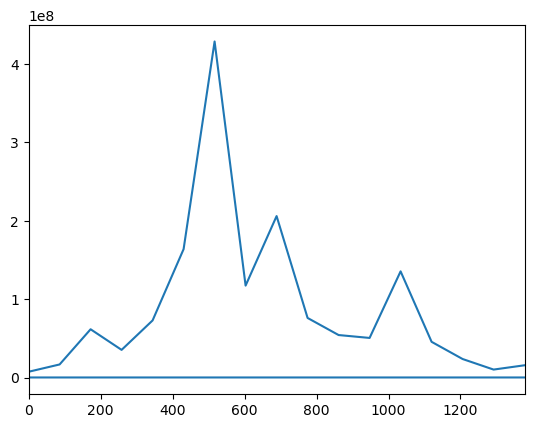

RHoch


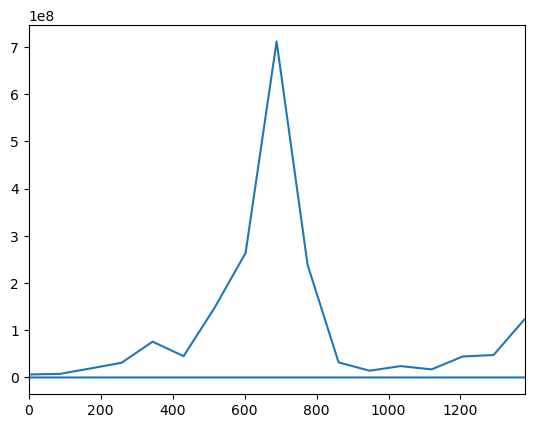

RTief


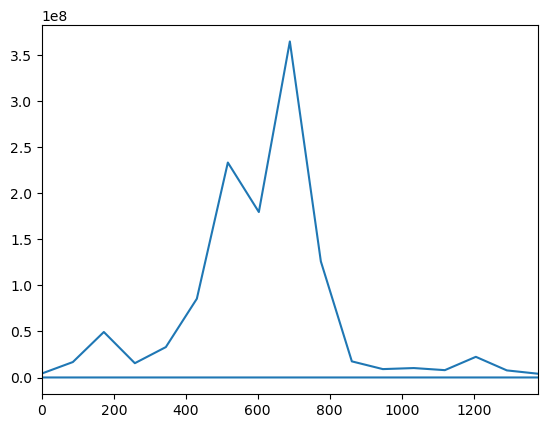

RLinks


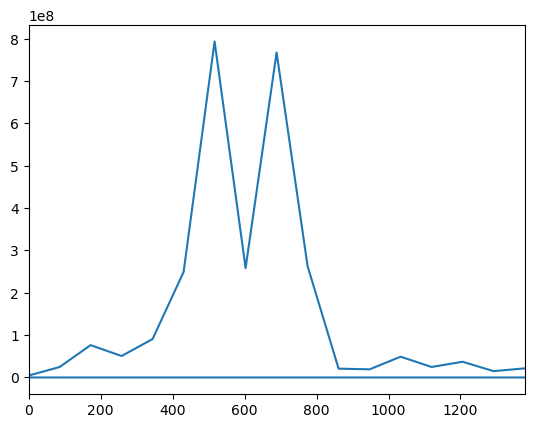

RRechts


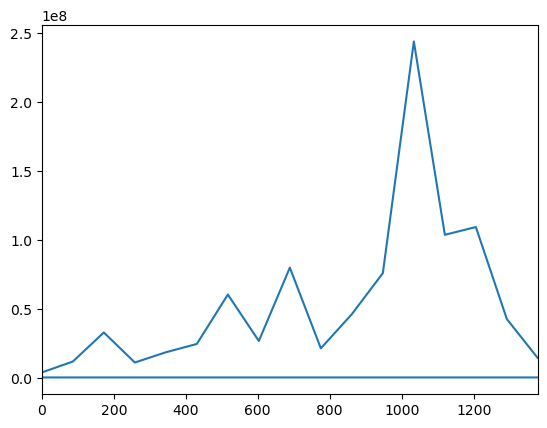

RDHoch


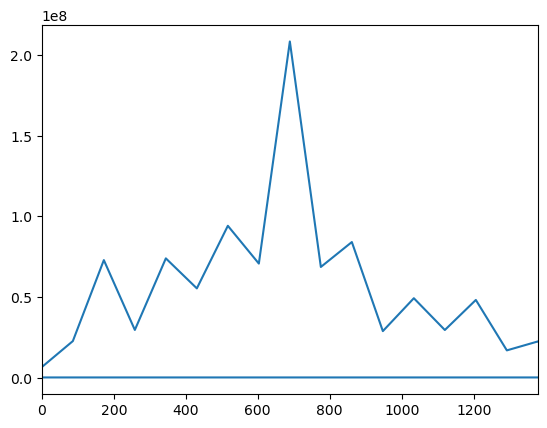

RDTief


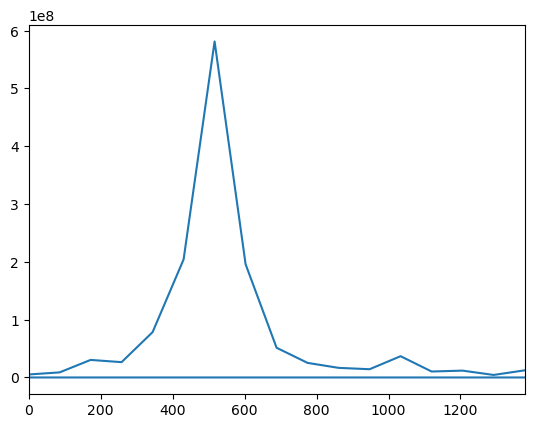

RDLinks


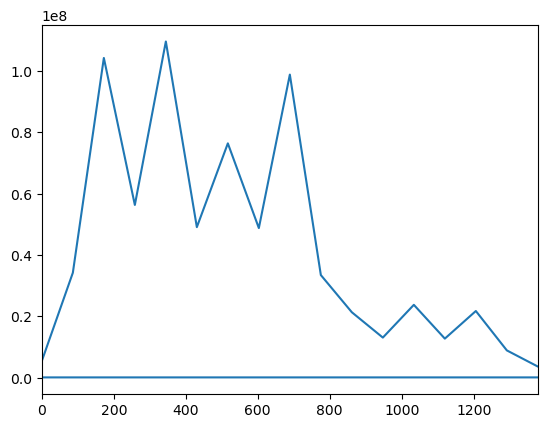

RDRechts


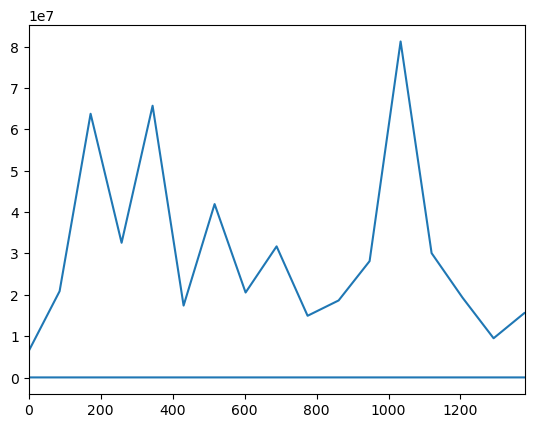

In [31]:
commands = ["Hoch", "Tief", "Links", "Rechts"]
numbers = ["1", "2", "3", "4", "5"]
window_size = 512

#Hardgecodeter schmutz, aber scheint zu funktionieren... nimmt ordner und gibt fuer die commands ein gemitteltes spektrum
def get_and_print_ref_spec_folder(folder):
    for command in commands:
        #init array
        spec = np.zeros(window_size, dtype=np.complex128)
        #in dominiks folder den filenamen anpassen
        if(folder == "referenz_dominik"):
            command = "RD" + command
        #im referenz folder den filenamen anpassen
        if(folder == "referenz"):
             command = "R" + command
        #fuer jedes file laden, triggern, in die windowing methode werfen und zum spec array adden
        for number in numbers:
            data = np.load(folder + "/" + command + number + ".npy")
            data = trig(data)

            freq_windowing, mag_spectrum_windowing = windowing_method(data)
            spec += mag_spectrum_windowing
        #spec array durchschnitt und plotten.
        spec = spec/len(numbers)
        print(command)
        plt.plot(freq_windowing, spec.real)
        plt.xlim(0, sample_rate / 32)  # Zeige nur positive Frequenzen
        plt.show()

#training, referenz und dominik reinwerfen.
get_and_print_ref_spec_folder("training")
get_and_print_ref_spec_folder("referenz")
get_and_print_ref_spec_folder("referenz_dominik")

### 2 c)

In [4]:
# bravais-pearson
def correlation_coefficient(x, y):
    # Calculate covariance
    covar = np.sum((x - np.mean(x)) * (y - np.mean(y)))

    # Calculate correlation coefficient
    correlation = covar / (np.std(x) * np.std(y))

    return correlation




### 2 d)

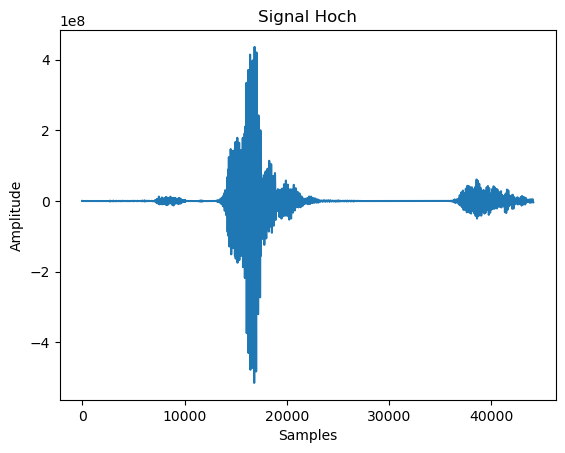

C:\Users\stefa\AppData\Local\Temp\ipykernel_27552\1115241299.py:47: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_window = np.array(signal.gaussian(512, 512 / 4))


Hoch1 Dominik: Links
Hoch2 Dominik: Links
Hoch3 Dominik: tief
Hoch4 Dominik: Links
Hoch5 Dominik: Links
Tief1 Dominik: Links
Tief2 Dominik: Links
Tief3 Dominik: hoch
Tief4 Dominik: tief
Tief5 Dominik: tief
Links1 Dominik: Links
Links2 Dominik: Links
Links3 Dominik: Links
Links4 Dominik: Rechts
Links5 Dominik: Rechts
Rechts1 Dominik: Links
Rechts2 Dominik: Rechts
Rechts3 Dominik: Links
Rechts4 Dominik: Rechts
Rechts5 Dominik: Rechts
Hitrate von Dominik Hoch: 0.0%
Hitrate von Dominik Tief: 40.0%
Hitrate von Dominik Links: 60.0%
Hitrate von Dominik Rechts: 60.0%
Hoch1 Stefan: Links
Hoch2 Stefan: hoch
Hoch3 Stefan: tief
Hoch4 Stefan: Links
Hoch5 Stefan: Links
Tief1 Stefan: Links
Tief2 Stefan: Links
Tief3 Stefan: Links
Tief4 Stefan: tief
Tief5 Stefan: Links
Links1 Stefan: Links
Links2 Stefan: tief
Links3 Stefan: Links
Links4 Stefan: tief
Links5 Stefan: tief
Rechts1 Stefan: Links
Rechts2 Stefan: Rechts
Rechts3 Stefan: Rechts
Rechts4 Stefan: Links
Rechts5 Stefan: Rechts
Hitrate von Stefan Hoc

In [5]:
sampleFreq = 20000 - 32  # -32 weil muss durch 256 teilbar sein


def main():
    # Teil 1 c)
    data = np.load("training/Hoch1.npy")
    data = data[:100000]
    plt.title("Signal Hoch")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.plot(data)
    plt.savefig("Hoch_Signal.png", dpi=900)
    plt.show()
    # plotAndSave(fourierAufg3("Recordings/Hoch1.npy"), data, "Hoch1_Sample")

    # Teil 1 b)
    data = np.load("training/Hoch1.npy")[:sampleFreq]
    # plotAndSave(getSpectrum("Recordings/Hoch1.npy"), data, "Hoch1")

    # Teil 2 a)
    refHoch = getAndPrintReferenzspektrum("Hoch")
    refTief = getAndPrintReferenzspektrum("Tief")
    refRechts = getAndPrintReferenzspektrum("Rechts")
    refLinks = getAndPrintReferenzspektrum("Links")

    # Teil 2 c) + d)
    spracherkenner(refHoch, refTief, refLinks, refRechts)


def fourierAufg3(file):
    data = np.load(file)
    data = data[:100000]

    return np.fft.fft(data) * 0.00001


def getSpectrum(file):
    data = np.load(file)[:sampleFreq]

    window = np.array(list(getWindows(data, 512)))

    return np.fft.fft(window).mean(0)


def getWindows(arr, window_size):
    ret = []
    gauss_window = np.array(signal.gaussian(512, 512 / 4))

    for i in range(0, len(arr) - window_size + 1, math.floor(window_size / 2)):  # /2 weil zur Hälfte überlappen
        ret.append(np.concatenate(
            [[0] * i, list(gauss_window * (arr[i:i + window_size])), [0] * (len(arr) - (i + window_size))]))

    return ret


def plotAndSave(fourier, data, filename):
    print(len(fourier))

    f = []
    for index in range(0, len(data), 1):
        f.append(index / (len(data) * 0.00001))
    f = np.array(f)

    plt.title('Fouriertransformierte')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequenz (Hz)')
    plt.grid(True)
    plt.xlim(0, 2000)
    plt.gcf().subplots_adjust(left=0.15)
    plt.plot(f[:len(f) // 2], np.abs(fourier[:len(fourier) // 2]))
    plt.savefig("PNG/" + filename + ".png", dpi=900)
    plt.show()


def getAndPrintReferenzspektrum(name):
    spektrum = getSpectrum("training/" + name + "1.npy")
    spektrum += getSpectrum("training/" + name + "2.npy")
    spektrum += getSpectrum("training/" + name + "3.npy")
    spektrum += getSpectrum("training/" + name + "4.npy")
    spektrum += getSpectrum("training/" + name + "5.npy")

    spektrum = spektrum / 5
    return spektrum


commands = ["Hoch", "Tief", "Links", "Rechts"]


def spracherkenner(refHoch, refTief, refLinks, refRechts):
    names = []
    refHoch = np.abs(refHoch)
    refTief = np.abs(refTief)
    refLinks = np.abs(refLinks)
    refRechts = np.abs(refRechts)

    for c in commands:
        for n in range(1, 6):
            names.append(c + str(n))

    treffer = [0, 0, 0, 0]

    for n in names:
        spec = np.load("referenz_dominik/RD" + n + ".npy")[:19968]
        spec = np.abs(np.fft.fft(spec))

        maximum = [correlation_coefficient(spec, refHoch), correlation_coefficient(spec, refTief),
                    correlation_coefficient(spec, refLinks), correlation_coefficient(spec, refRechts)]

        if np.max(maximum) == maximum[0]:
            print(n + " Dominik: hoch")
            if n[0:4] == commands[0]:
                treffer[0] += 1
        elif np.max(maximum) == maximum[1]:
            print(n + " Dominik: tief")
            if n[0:4] == commands[1]:
                treffer[1] += 1
        elif np.max(maximum) == maximum[2]:
            print(n + " Dominik: Links")
            if n[0:5] == commands[2]:
                treffer[2] += 1
        elif np.max(maximum) == maximum[3]:
            print(n + " Dominik: Rechts")
            if n[0:6] == commands[3]:
                treffer[3] += 1

    printHitrate(treffer, 'Dominik')

    treffer = [0, 0, 0, 0]

    for n in names:
        spec = np.load("referenz/R" + n + ".npy")[:19968]
        spec = np.abs(np.fft.fft(spec))

        maximum = [correlation_coefficient(spec, refHoch), correlation_coefficient(spec, refTief),
                    correlation_coefficient(spec, refLinks), correlation_coefficient(spec, refRechts)]

        if np.max(maximum) == maximum[0]:
            print(n + " Stefan: hoch")
            if n[0:4] == 'Hoch':
                treffer[0] += 1
        elif np.max(maximum) == maximum[1]:
            print(n + " Stefan: tief")
            if n[0:4] == 'Tief':
                treffer[1] += 1
        elif np.max(maximum) == maximum[2]:
            print(n + " Stefan: Links")
            if n[0:5] == 'Links':
                treffer[2] += 1
        elif np.max(maximum) == maximum[3]:
            print(n + " Stefan: Rechts")
            if n[0:6] == 'Rechts':
                treffer[3] += 1

    printHitrate(treffer, 'Stefan')


def printHitrate(treffer, name):
    print("Hitrate von " + name + " Hoch: " + str(float(treffer[0]) / float(5) * 100) + "%")
    print("Hitrate von " + name + " Tief: " + str(float(treffer[1]) / float(5) * 100) + "%")
    print("Hitrate von " + name + " Links: " + str(float(treffer[2]) / float(5) * 100) + "%")
    print("Hitrate von " + name + " Rechts: " + str(float(treffer[3]) / float(5) * 100) + "%")


main()